In [97]:
import numpy as np
import matplotlib.pyplot as plt

## Quadratic fit

We extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

First I define the linear function parameters:

In [64]:
# target parameters of f(x)
a = 3
b = -2
c= -3
d= 4

In [65]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a*x_valid**3 + b* x_valid**2 + c*x_valid + d # ideal (target) linear function

In [66]:
sigma = 0.1 # noise standard deviation
y_train = np.random.normal(a*x_train**3 + b* x_train**2 + c*x_train + d , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid**3 + b* x_valid**2 + c*x_valid + d , sigma)

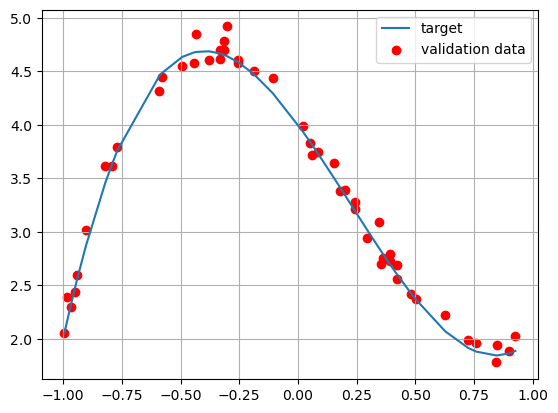

In [67]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

We then create the NN with $N_{layers}$ and $N$ neurons in each layer (not necessarily the same for all layers).

By testing out with a few different values, we find that some combinations of layers and neurons fail to produce results entirely, while others are relatively effective.

Here we will use 5 layers composed of 30 neurons, but decent results can be achieved with less layers and neurons.

Because of bias-variance trade-off, a setup with too few parameters will likely be underfitted, while one with too many will experience overfitting.

In [17]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [68]:
model = tf.keras.Sequential()
model.add(Dense(30, input_shape=(1,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function.

In [69]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 11.3947 - mse: 11.3947 - val_loss: 10.0015 - val_mse: 10.0015
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0046 - mse: 9.0046 - val_loss: 5.7673 - val_mse: 5.7673
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3708 - mse: 4.3708 - val_loss: 2.4673 - val_mse: 2.4673
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0017 - mse: 2.0017 - val_loss: 2.1153 - val_mse: 2.1153
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6043 - mse: 1.6043 - val_loss: 1.6967 - val_mse: 1.6967
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0980 - mse: 1.0980 - val_loss: 1.3375 - val_mse: 1.3375
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8195 - mse: 0.8195 - val_loss: 1.0002 - val_mse: 1.0002
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6460 - mse: 0.6460 - val_loss: 0.7176 - val_mse: 0.7176
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3493 - 

Weight is m parameter; bias is b:

In [70]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - mse: 0.0160 

Test loss: 0.015046685934066772
Test accuracy: 0.015046685934066772


In [71]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 - mse: 0.0090 

Test loss: 0.007702329661697149
Test accuracy: 0.007702329661697149


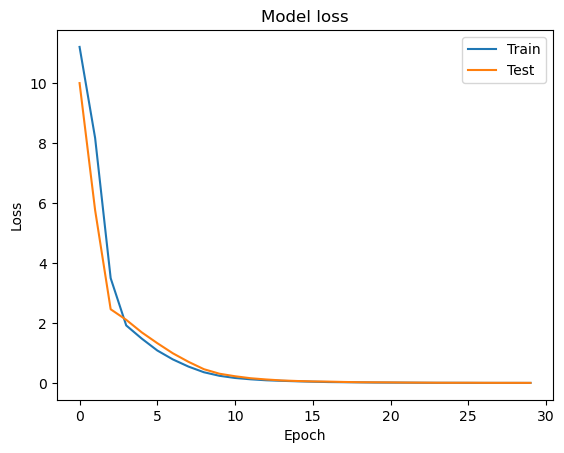

In [72]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


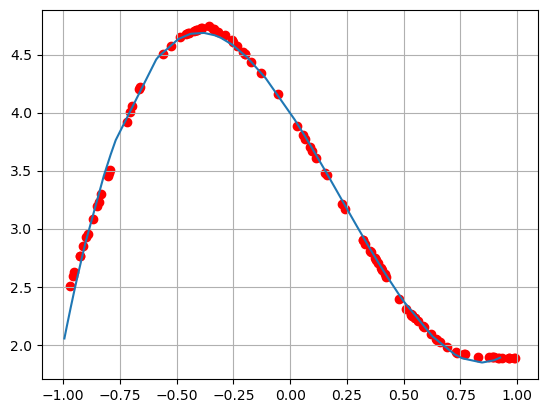

In [73]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

What about data outside the [-1,1] range?

Here are the model predictions:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step


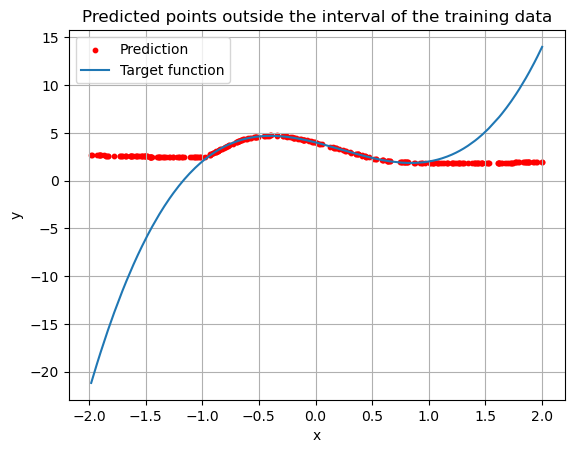

In [77]:
x_test_out = np.random.uniform(-2, 2, 300)
y_test_out = np.random.normal(4. - 3.*x_test_out - 2.*x_test_out**2 + 3.*x_test_out**3, sigma)
x_test_out.sort() #sorting to plot target function
y_test_target_out = d + c*x_test_out + b*x_test_out**2 + a*x_test_out**3
y_predicted_out = model.predict(x_test_out)

plt.scatter(x_test_out, y_predicted_out,color='r', s=10, label="Prediction")
plt.plot(x_test_out, y_test_target_out, label="Target function")
plt.title("Predicted points outside the interval of the training data")
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.legend()

plt.show()

## Comparing optimizers and activation functions

Here we compare results obtained with a number of different optimizers, activation functions and loss functions.

In [85]:
opt=['sgd', 'adam']
act=['relu', 'elu']
lossf=['mse', 'mae']

def create_NN(opt, act, lossf):
    model = tf.keras.Sequential()
    model.add(Dense(30, input_shape=(1,), activation=act))
    model.add(Dense(30, activation=act))
    model.add(Dense(30, activation=act))
    model.add(Dense(30, activation=act))
    model.add(Dense(30, activation=act))
    model.add(Dense(1, activation='relu'))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer=opt, loss=lossf, metrics=[lossf])
    
    return model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


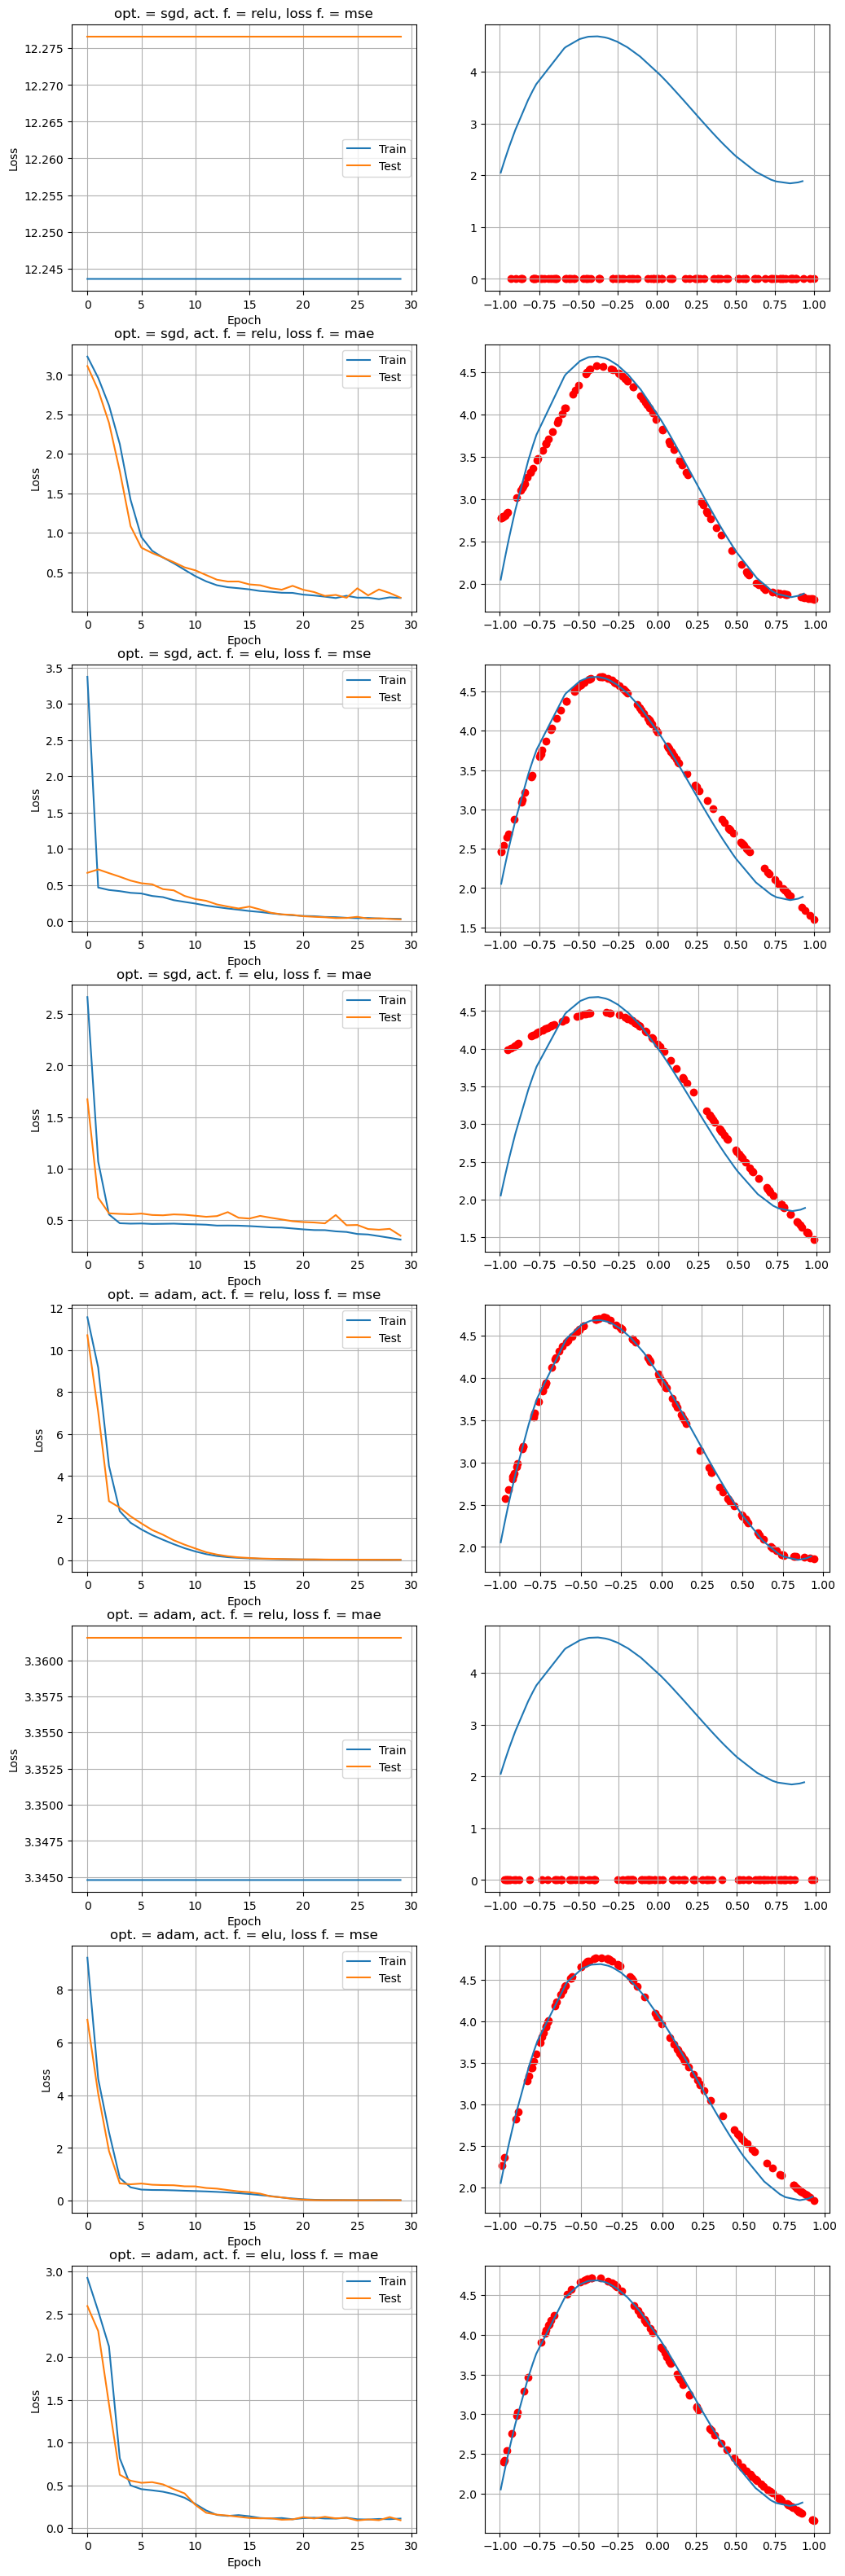

In [98]:
#fig, axs = plt.subplots(4, 2, sharey=False, tight_layout=True, figsize=(12, 36))
plt.figure(figsize=(12, 40))

for i in range(2):
    for j in range(2):
        for k in range(2):
            model=create_NN(opt[i], act[j], lossf[k])

            history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=30, verbose=0,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid))

            plt.subplot(8, 2, (4*i+2*j+k)*2+1)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='best')
            plt.title('opt. = ' + opt[i] + ', act. f. = ' + act[j] + ', loss f. = ' + lossf[k])
            plt.grid(True)
            
            plt.subplot(8, 2, (4*i+2*j+k)*2+2)
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model.predict(x_predicted)
            plt.scatter(x_predicted, y_predicted,color='r')
            plt.plot(x_valid, y_target)
            plt.grid(True)

plt.show()